# Exploring the Data

## 1.1 Load the Datasets
- Use head(), info(), and describe() methods to get a quick overview of each dataset.

In [229]:
#import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Chocolate Bar Ratings

In [230]:
#Load the dataset
file_path = '/Users/saniaspry/Documents/Flatiron/Phase-3/rapideda/chocolate bar ratings eda/flavors_of_cacao.csv'
df = pd.read_csv(file_path)

In [231]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [232]:
#concise summary of info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


- missing value in broad bean origin 
- missing value  in bean type
- cocoa percentage should be converted to a float for better analysis

In [233]:
df.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


## 1.2 Understand the Structure
- Identify the key features in each data
- Use value_counts() to look at the distribution of key categorical variables

In [234]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

### Key Data Features
- Company (Maker): Brand or manufacturer of the chocolate.
- Specific Bean Origin/Bar Name: Source of the cocoa or name of the chocolate bar.
- Review Date: Date of the review, useful for trend analysis over time.
- Cocoa Percent: Percentage of cocoa in the chocolate bar, influencing flavor.
- Company Location: Country of the chocolate maker, reflecting regional quality.
- Rating: Score given to each chocolate bar (e.g., 1 to 5 scale).
- Bean Type: Type of cocoa bean used (e.g., Forastero, Criollo, Trinitario).
- Broad Bean Origin: General geographic region where the beans are sourced.

### Key Data Insights
- **Average Ratings by Company**: Identify which companies produce the highest-rated chocolate.
- **Impact of Cocoa Percentage**: Analyze the correlation between cocoa content and ratings.
- **Trends Over Time**: Examine how ratings change over the years.
- **Regional Preferences**: Determine which geographical origins yield the best-rated bars.
- **Distribution of Ratings**: Understand the overall sentiment towards chocolate bars.
- **Effect of Bean Type**: Investigate how different bean types influence ratings.
- **Outliers and Quality Control**: Spot exceptional products or potential quality issues.
- **Correlation Analysis**: Explore relationships between numeric features (e.g., cocoa percent and ratings).


# Data Cleaning & Formatting

## 2.1 Clean column names

In [235]:
#clean column names by removing \n and stripping extra white space for better readablitity 
df.columns = df.columns.str.replace('\n', ' ', regex=True).str.strip()
df.columns

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')

## 2.2 Handle Missing values

In [236]:
#check for missing values 
print(df.isnull().sum())

Company  (Maker-if known)           0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64


- since there is only 1 value missing for each column we are going to drop the rows with missing values

In [237]:
#drop rows with missing values
df = df.dropna()
df.isnull().sum()

Company  (Maker-if known)           0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   0
dtype: int64

## 2.3 Handle Incorrect Data Types

In [238]:
# Convert Cocoa Percent to a numerical value to perform analysis
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)
df['Cocoa Percent']

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: Cocoa Percent, Length: 1793, dtype: float64

## 2.4 Filter Region Names

In [239]:
top_origins = df['Broad Bean Origin'].value_counts().head(50)
print(top_origins)

Broad Bean Origin
Venezuela                 214
Ecuador                   193
Peru                      165
Madagascar                145
Dominican Republic        141
                           73
Nicaragua                  60
Brazil                     58
Bolivia                    57
Belize                     49
Papua New Guinea           42
Colombia                   40
Costa Rica                 38
Vietnam                    38
Tanzania                   34
Ghana                      33
Trinidad                   33
Mexico                     30
Hawaii                     28
Guatemala                  28
Domincan Republic          25
Jamaica                    20
Grenada                    19
Indonesia                  16
Honduras                   15
Cuba                       11
Congo                      10
Sao Tome                   10
Haiti                       9
Fiji                        8
Carribean                   8
St. Lucia                   8
Uganda                

In [240]:
# Filter the dataset to only include top 10 origins
top_origins_list = top_origins.index
df_top_origins = df[df['Broad Bean Origin'].isin(top_origins_list)]
df_top_origins


,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


## 2.5 Create New Columns/Features

Review Year: Extract the year from the review date for trend analysis.

In [241]:
df['Review Year'] = pd.to_datetime(df['Review Date'], format='%Y').dt.year
df['Review Year']


0       2016
1       2015
2       2015
3       2015
4       2015
        ... 
1790    2011
1791    2011
1792    2011
1793    2011
1794    2010
Name: Review Year, Length: 1793, dtype: int32

Average Rating by Company: Calculate the average rating for each company.

In [242]:
df['Company\xa0 (Maker-if known)']

0       A. Morin
1       A. Morin
2       A. Morin
3       A. Morin
4       A. Morin
          ...   
1790      Zotter
1791      Zotter
1792      Zotter
1793      Zotter
1794      Zotter
Name: Company  (Maker-if known), Length: 1793, dtype: object

In [243]:
company_avg_rating = df.groupby('Company\xa0 (Maker-if known)')['Rating'].mean().reset_index()
company_avg_rating.rename(columns={'Rating': 'Average Rating'}, inplace=True)
df = df.merge(company_avg_rating, on='Company\xa0 (Maker-if known)', how='left')
company_avg_rating


,Company (Maker-if known),Average Rating
0,A. Morin,3.380435
1,AMMA,3.500000
2,Acalli,3.750000
3,Adi,3.250000
4,Aequare (Gianduja),2.875000
...,...,...
411,hello cocoa,3.125000
412,hexx,3.050000
413,iQ Chocolate,2.875000
414,organicfair,2.850000


In [244]:
company_avg_rating.describe()

,Average Rating
count,416.000000
mean,3.084993
std,0.374721
min,1.000000
25%,2.845833
50%,3.125000
75%,3.359375
max,4.000000


Bean Type Count: Count the occurrences of each bean type in the dataset.



In [245]:

bean_type_count = df['Bean Type'].value_counts().reset_index()
bean_type_count.columns = ['Bean Type', 'Count']
bean_type_count

,Bean Type,Count
0,,887
1,Trinitario,418
2,Criollo,153
3,Forastero,87
4,Forastero (Nacional),52
5,Blend,41
6,"Criollo, Trinitario",39
7,Forastero (Arriba),37
8,Criollo (Porcelana),10
9,"Trinitario, Criollo",9


Rating Category: Categorize ratings into qualitative groups for better insight (e.g., 'Elite', 'Premium', etc.)

In [246]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['Unpleasant', 'Disappointing', 'Satisfactory', 'Premium', 'Elite']
df['Rating Category'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)
df['Rating Category'].value_counts()


Rating Category
Premium          1246
Satisfactory      431
Elite              97
Disappointing      17
Unpleasant          0
Name: count, dtype: int64

## Data Analysis ##

### Average Ratings by Company

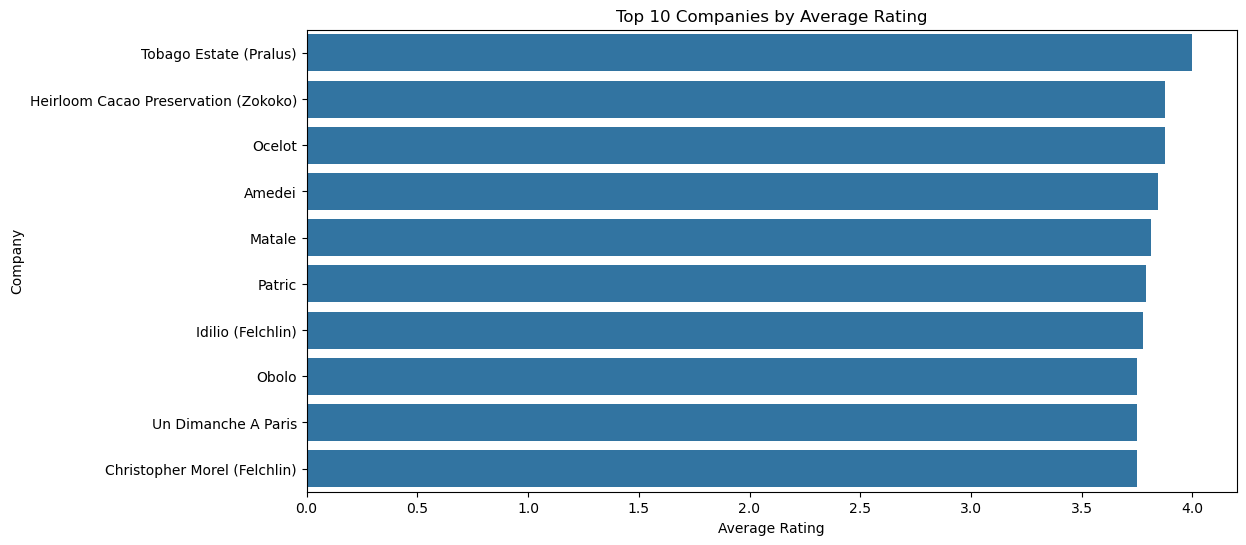

In [247]:
plt.figure(figsize=(12, 6))
avg_rating_company = df.groupby('Company\xa0 (Maker-if known)')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_company.values, y=avg_rating_company.index)
plt.title("Top 10 Companies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Company")
plt.show()


- the company with the highest average rating is Tobago Estate with a 4.0 rating score
- the average company rating is 3.0 

### Impact of Cocoa Percentage

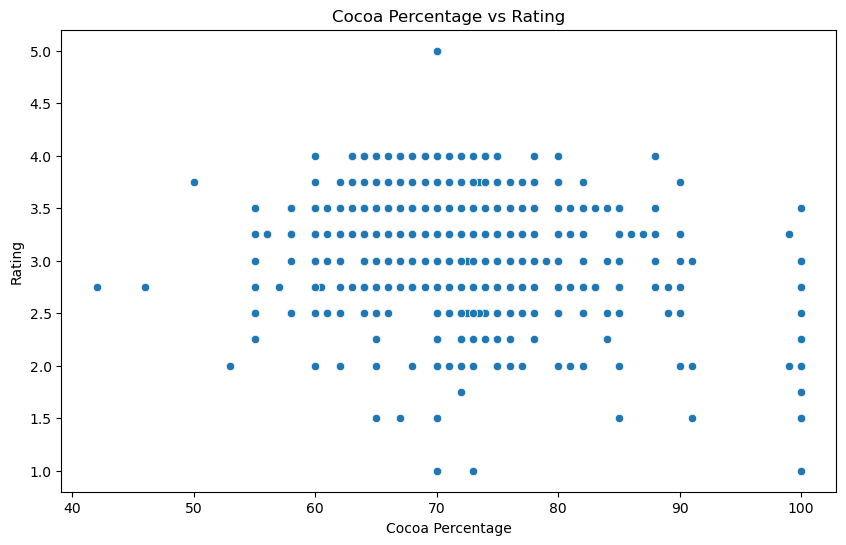

In [248]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cocoa Percent', y='Rating')
plt.title("Cocoa Percentage vs Rating")
plt.xlabel("Cocoa Percentage")
plt.ylabel("Rating")
plt.show()


- there are a few outliers within this graph
- chocolate with a high rating usually contains anywhere from 60% - 90% of cocoa

### Trends Over Time:

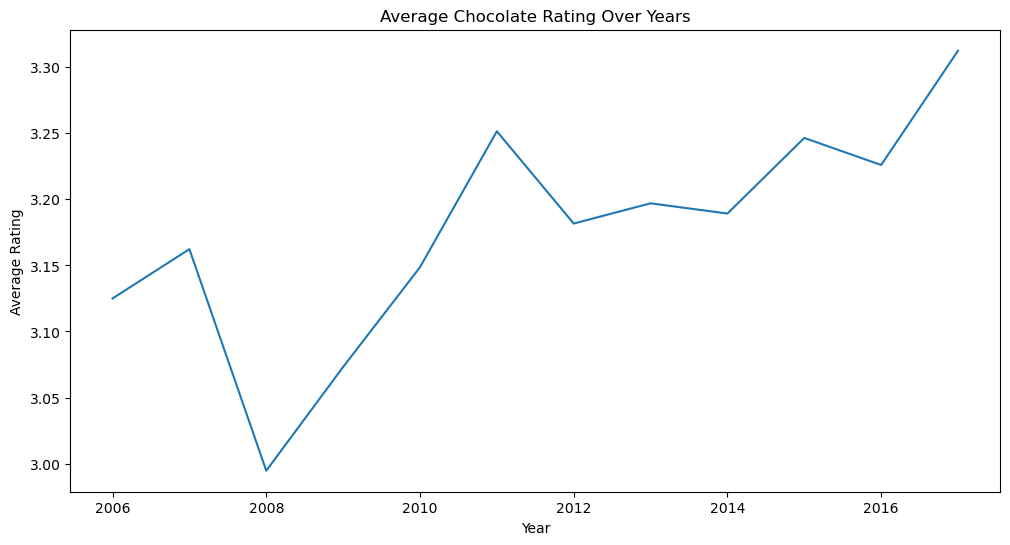

In [249]:
plt.figure(figsize=(12, 6))
rating_trend = df.groupby('Review Year')['Rating'].mean()
sns.lineplot(x=rating_trend.index, y=rating_trend.values)
plt.title("Average Chocolate Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


- as time increases the average rating increases as well which might be influenced different factors such as new reciepes, technology advancemnt, and demand for chocolate.

### Regional Preferences

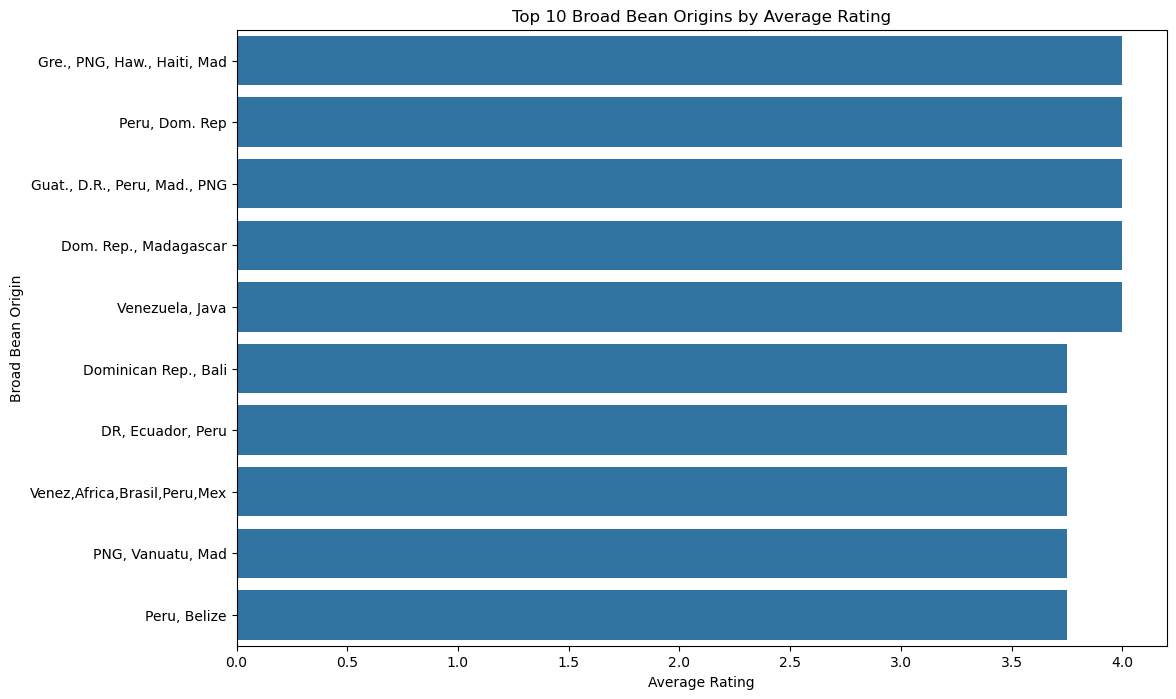

In [250]:
plt.figure(figsize=(12, 8))
regional_ratings = df.groupby('Broad Bean Origin')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=regional_ratings.values, y=regional_ratings.index)
plt.title("Top 10 Broad Bean Origins by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Broad Bean Origin")
plt.show()


### Distribution of Ratings:


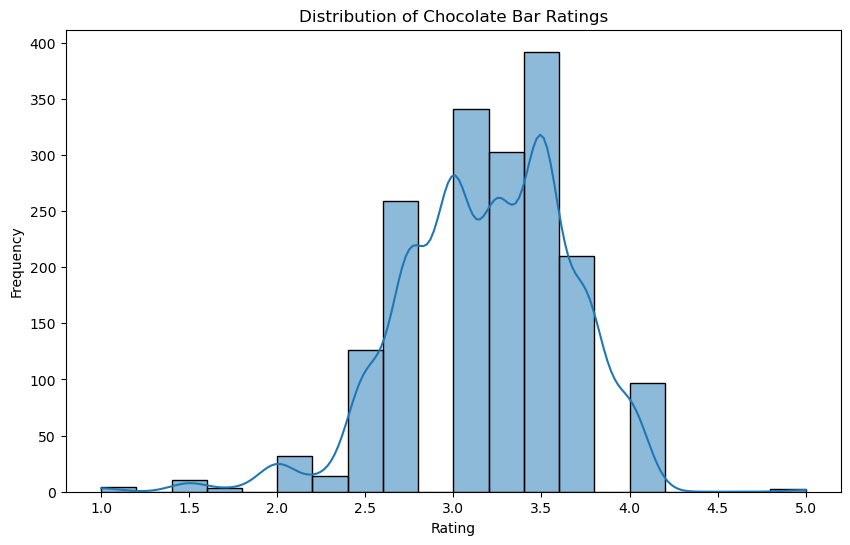

In [251]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Chocolate Bar Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


### Effect of Bean Type

Outliers and Quality Control:

In [252]:
# Top 5 and Bottom 5 Rated Bars
print("Top Rated Bars:")
print(df.nlargest(5, 'Rating'))

print("\nLowest Rated Bars:")
print(df.nsmallest(5, 'Rating'))

Top Rated Bars:
   Company  (Maker-if known) Specific Bean Origin or Bar Name   REF  \
78                    Amedei                            Chuao   111   
86                    Amedei                    Toscano Black    40   
9                   A. Morin                          Pablino  1319   
17                  A. Morin                            Chuao  1015   
20                  A. Morin             Chanchamayo Province  1019   

    Review Date  Cocoa Percent Company Location  Rating   Bean Type  \
78         2007           70.0            Italy     5.0  Trinitario   
86         2006           70.0            Italy     5.0       Blend   
9          2014           70.0           France     4.0               
17         2013           70.0           France     4.0  Trinitario   
20         2013           63.0           France     4.0               

   Broad Bean Origin  Review Year  Average Rating Rating Category  
78         Venezuela         2007        3.846154             